<a href="https://colab.research.google.com/github/bw1112/EDAVproject/blob/master/HW5_Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Task 2 [40 Points]
Train a multilayer perceptron (fully connected) on the Fashion MNIST dataset using the traditional train/test split as given by fashion_mnist.load_data in keras. Use a separate 10000 samples (from the training set) for model selection and to compute learning curves (accuracy vs epochs, not vs n_samples). Compare a “vanilla” model with a model using drop-out (potentially a bigger model), and to a model using batch normalization and residual connections (but not dropout). Visualize learning curves for all models.


In [0]:
import numpy as np
import pandas as pd
import keras

In [60]:
import tensorflow as tf
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))
sess

## Loading Data

In [0]:
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

## Preparing Data

In [0]:
# subset a separated 10,000 sample from training set

X_train_sub = x_train[:10000]
y_train_sub = y_train[:10000]

In [65]:
X_train_image = X_train_sub.reshape(-1, 784)
X_train_image = X_train_image.astype('float32')
X_train_image /= 255

y_train_image = keras.utils.to_categorical(y_train_sub, num_classes=10)

print(f"X_train_image size: {X_train_image.shape}")
print(f"y_train_image size: {y_train_image.shape}")

X_train_image size: (10000, 784)
y_train_image size: (10000, 10)


## A Vanilla Model

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation

model_vanilla = Sequential([
    Dense(32, input_shape=(784,)),
    Activation('relu'),
    Dense(32),
    Activation('relu'),
    Dense(10),
    Activation('softmax')])

model_vanilla.compile("adam", "categorical_crossentropy", metrics=['accuracy'])

In [0]:
history_callback_vanilla = model_vanilla.fit(X_train_image, 
                                             y_train_image, 
                                             batch_size=128, 
                                             epochs=100, 
                                             verbose=0, 
                                             validation_split=0.1)

# A Dropout model

In [75]:
from keras.layers import Dropout

model_dropout = Sequential([
    Dense(1024, input_shape=(784,), activation='relu'),
    Dropout(.5),
    Dense(1024, activation='relu'),
    Dropout(.5),
    Dense(10, activation='softmax'),
])

# model_dropout = Sequential([
#         Dense(32, input_shape(784,)),
#         Activation('relu'),
#         Dropout(0.3),
#         Dense(32),
#         Activation('relu'),
#         Dropout(0.3),     
#         Dense(3),
#         Activation('softmax')])

model_dropout.compile("adam", "categorical_crossentropy", metrics=['accuracy'])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
history_callback_dropout = model_dropout.fit(X_train_image, y_train_image,
                                             batch_size=128, 
                                             epochs=100, 
                                             verbose=0, 
                                             validation_split=.1)

## A Bach Normalization and Residual Connection model

In [0]:
from keras.layers import BatchNormalization
from keras.layers import Input, Dense
from keras.models import Model


inputs = Input(shape=(784,))

x = Dense(64, activation='relu')(inputs)
x = BatchNormalization()(x)
x = Dense(64, activation='relu')(x)
x = BatchNormalization()(x)
predictions = Dense(10, activation='softmax')(x)


model_bnrc = Model(inputs=inputs, outputs=predictions)

model_bnrc.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
history_callback_bnrc = model_bnrc.fit(X_train_image, y_train_image,
                                             batch_size=128, 
                                             epochs=100, 
                                             verbose=0, 
                                             validation_split=.1)

## Model Comparison

In [0]:
res_vanilla = pd.DataFrame(history_callback_vanilla.history)['acc']
res_dropout = pd.DataFrame(history_callback_dropout.history)['acc']
res_bnrc = pd.DataFrame(history_callback_bnrc.history)['acc']

In [0]:
df = pd.DataFrame({'vanilla': res_vanilla, 
                   'dropout': res_dropout,
                   'batch_norm_res_con': res_bnrc})

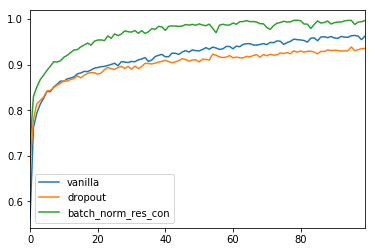

In [98]:
df.plot()